In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
df = pd.read_csv("/Users/rajashree/Downloads/Projects /customer_churn_dataset-testing-master.csv")

In [3]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


In [5]:
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000
mean,32187.500000,41.970982,31.994827,15.080234,5.400690,17.133952,541.023379,15.498850,0.473685
std,18583.317451,13.924911,17.098234,8.816470,3.114005,8.852211,260.874809,8.638436,0.499311
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,16094.250000,30.000000,18.000000,7.000000,3.000000,10.000000,313.000000,8.000000,0.000000
50%,32187.500000,42.000000,33.000000,15.000000,6.000000,19.000000,534.000000,15.000000,0.000000
75%,48280.750000,54.000000,47.000000,23.000000,8.000000,25.000000,768.000000,23.000000,1.000000
max,64374.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [9]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

In [10]:
numerical_coulums = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 
                'Payment Delay', 'Contract Length', 'Total Spend']

In [11]:
numerical_coulums

['Age',
 'Tenure',
 'Usage Frequency',
 'Support Calls',
 'Payment Delay',
 'Contract Length',
 'Total Spend']

In [13]:
df.isna().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [14]:
print(df.dtypes)


CustomerID            int64
Age                   int64
Gender               object
Tenure                int64
Usage Frequency       int64
Support Calls         int64
Payment Delay         int64
Subscription Type    object
Contract Length      object
Total Spend           int64
Last Interaction      int64
Churn                 int64
dtype: object


In [15]:
df['Contract Length']

0          Monthly
1          Monthly
2           Annual
3        Quarterly
4           Annual
           ...    
64369    Quarterly
64370       Annual
64371      Monthly
64372      Monthly
64373      Monthly
Name: Contract Length, Length: 64374, dtype: object

<Axes: >

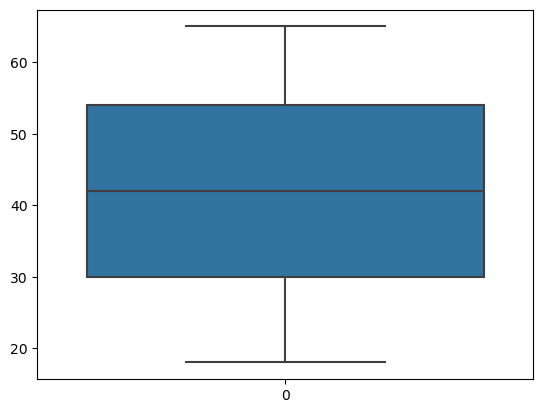

In [16]:
sns.boxplot(df['Age'])

<Axes: >

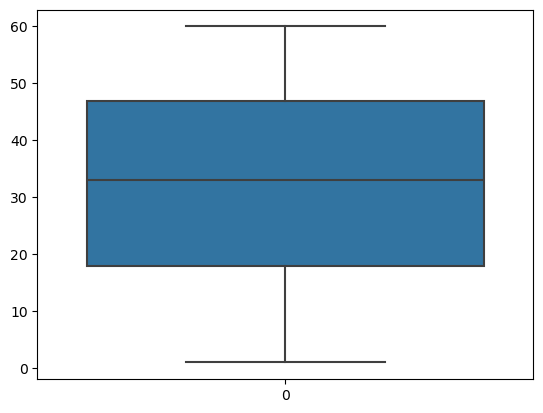

In [17]:
sns.boxplot(df['Tenure'])

<Axes: >

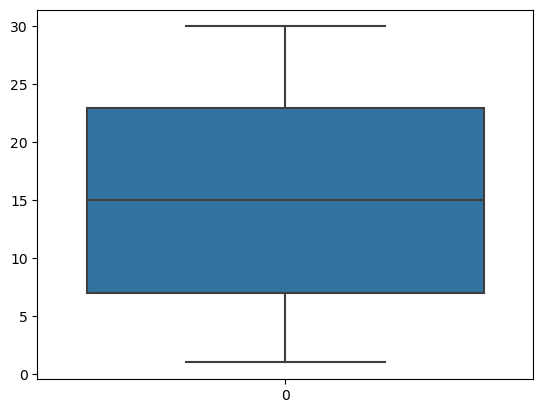

In [18]:
sns.boxplot(df['Usage Frequency'])

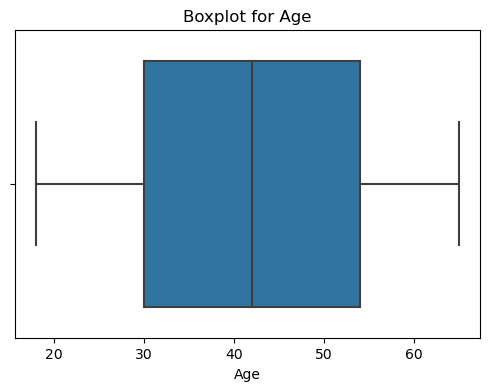

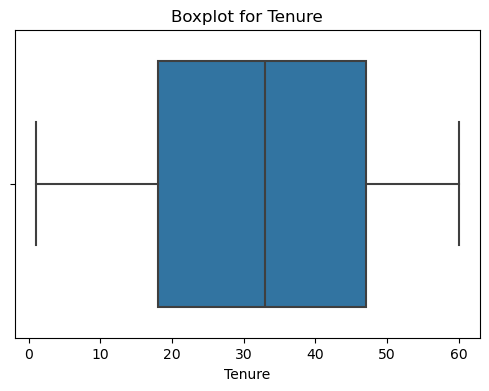

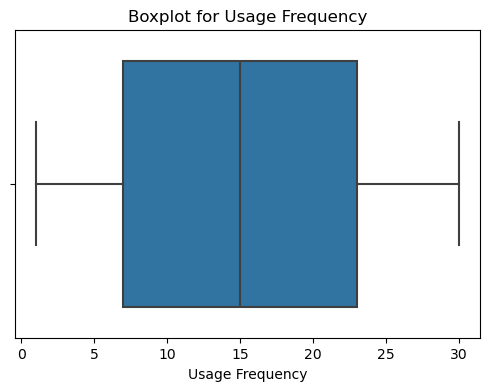

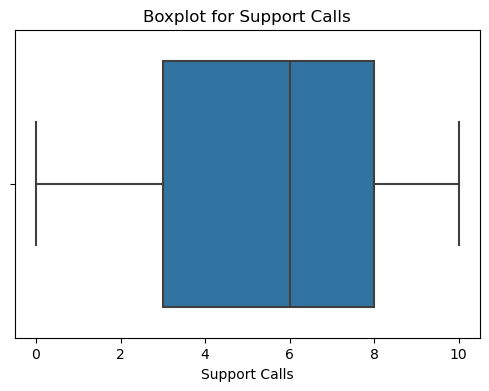

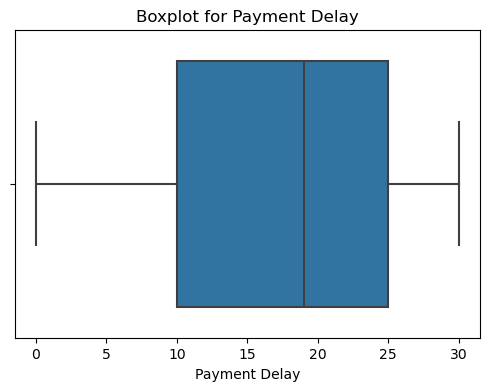

TypeError: Horizontal orientation requires numeric `x` variable.

<Figure size 600x400 with 0 Axes>

In [22]:

numeric_cols = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls',
                'Payment Delay', 'Contract Length', 'Total Spend']

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot for {col}")
    plt.show()
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [23]:
df.drop(['CustomerID'], axis=1, inplace=True)


In [24]:
df.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [30]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Gender'] 

0        0
1        0
2        1
3        1
4        0
        ..
64369    0
64370    1
64371    1
64372    0
64373    0
Name: Gender, Length: 64374, dtype: int64

In [25]:
df = pd.get_dummies(df, columns=['Subscription Type'], drop_first=True)


In [26]:
df.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Contract Length,Total Spend,Last Interaction,Churn,Subscription Type_Premium,Subscription Type_Standard
0,22,Female,25,14,4,27,Monthly,598,9,1,False,False
1,41,Female,28,28,7,13,Monthly,584,20,0,False,True
2,47,Male,27,10,2,29,Annual,757,21,0,True,False
3,35,Male,9,12,5,17,Quarterly,232,18,0,True,False
4,53,Female,58,24,9,2,Annual,533,18,0,False,True


In [45]:
X = df.drop('Churn', axis=1)  # Features
y = df['Churn']  # Target

In [46]:
X_encoded = pd.get_dummies(X)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [49]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data, and transform the test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [50]:
model = LogisticRegression()

# Train the model with the scaled training data
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [51]:
y_pred_scaled = model.predict(X_test_scaled)

# Calculate accuracy
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

In [52]:
from sklearn.metrics import confusion_matrix

In [53]:
cm = confusion_matrix(y_test, y_pred_scaled)

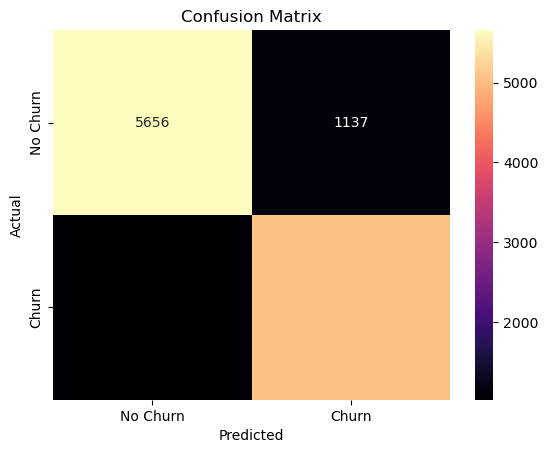

In [55]:
sns.heatmap(cm, annot=True, fmt="d", cmap="magma", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred_scaled)
precision = precision_score(y_test, y_pred_scaled)
recall = recall_score(y_test, y_pred_scaled)
f1 = f1_score(y_test, y_pred_scaled)

# Print the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.83
Precision: 0.82
Recall: 0.83
F1-Score: 0.82


In [62]:
from sklearn.metrics import roc_curve
# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_scaled)


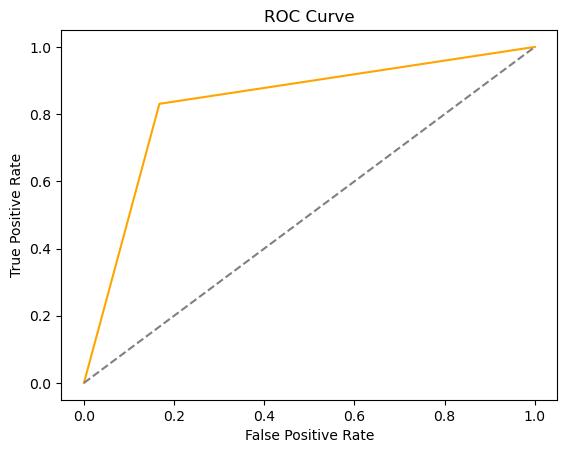

In [63]:
plt.plot(fpr, tpr, color='orange')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

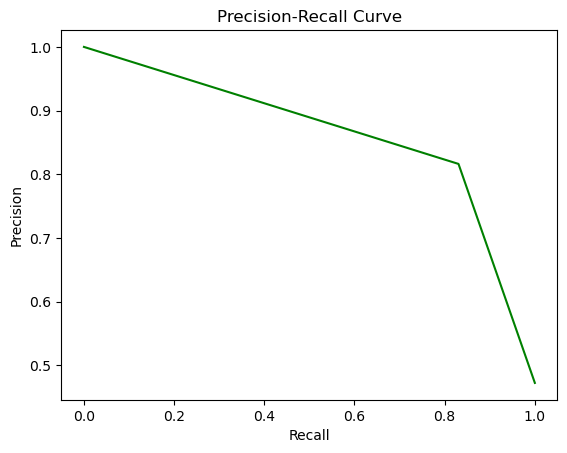

In [64]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_scaled)

# Plot Precision-Recall curve
plt.plot(recall, precision, color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()
